In [21]:
import pandas as pd

data = pd.read_csv("loan dataset.csv")
data_encoded = pd.get_dummies(data,drop_first=True)
data_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [22]:
data.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614,614,592,600,564
mean,5403,1621,146,342,1
std,6109,2926,86,65,0
min,150,0,9,12,0
25%,2878,0,100,360,1
50%,3812,1188,128,360,1
75%,5795,2297,168,360,1
max,81000,41667,700,480,1


In [23]:
data.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002473,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
# split features and labels
features = data_encoded.drop(columns='Loan_Status_Y')
# features = np.array(features)
labels = data_encoded['Loan_Status_Y']
# labels = np.array(labels)


train_f, test_f, train_L, test_L = train_test_split(features,labels, test_size=0.25)
# Imputing missing values
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(train_f)
train_f = imp_train.transform(train_f)
test_f = imp_train.transform(test_f)

print("training data: ",len(train_L))
print("testing data: ",len(test_L))

training data:  460
testing data:  154


# Model : Decision Tree Classifier

Training Data Set Accuracy:  0.8065217391304348
Training Data F1 Score  0.8730385164051355
Training Precision: 0.7786259541984732
Training Recall: 0.9935064935064936
Testing Data Set Accuracy:  0.8506493506493507
Testing Data F1 Score  0.9053497942386831
Testing Precision: 0.8527131782945736
Testing Recall: 0.9649122807017544


<AxesSubplot:>

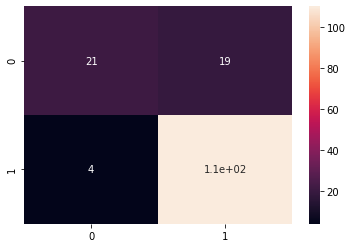

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
import seaborn as sns

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(train_f,train_L)
y_pred = tree_clf.predict(train_f)
print("Training Data Set Accuracy: ", accuracy_score(train_L,y_pred))
print("Training Data F1 Score ", f1_score(train_L,y_pred))
print ('Training Precision:', precision_score(train_L,y_pred))
print ('Training Recall:', recall_score(train_L,y_pred))

test_pred = tree_clf.predict(test_f)
print("Testing Data Set Accuracy: ", accuracy_score(test_L,test_pred))
print("Testing Data F1 Score ", f1_score(test_L,test_pred))
print ('Testing Precision:', precision_score(test_L,test_pred))
print ('Testing Recall:', recall_score(test_L,test_pred))

cf_matrix = confusion_matrix(test_L, test_pred)
sns.heatmap(cf_matrix, annot=True)

#### Visulazing Decision Tree with Max Depth = 3

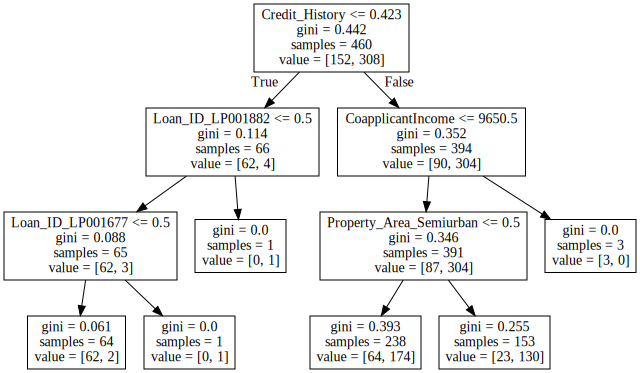

In [26]:
import graphviz
from sklearn import tree

features_df= data.drop(columns='Loan_Status')

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(train_f,train_L)
dot_data = tree.export_graphviz(tree_clf,feature_names = features.columns.tolist())
graph = graphviz.Source(dot_data)
graph

# Model : Random Forest Classifier

Training Data Set Accuracy:  0.6695652173913044
Training Data F1 Score  0.8020833333333333
Training Precision: 0.6695652173913044
Training Recall: 1.0
Testing Data Set Accuracy:  0.7402597402597403
Testing Data F1 Score  0.8507462686567165
Testing Precision: 0.7402597402597403
Testing Recall: 1.0


<AxesSubplot:>

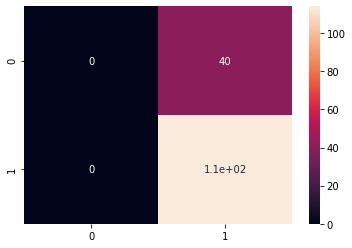

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000,max_depth=3,min_samples_leaf = 10)
rf.fit(train_f,train_L)
y_pred = rf.predict(train_f)
print("Training Data Set Accuracy: ", accuracy_score(train_L,y_pred))
print("Training Data F1 Score ", f1_score(train_L,y_pred))
print ('Training Precision:', precision_score(train_L,y_pred))
print ('Training Recall:', recall_score(train_L,y_pred))

test_pred = rf.predict(test_f)
print("Testing Data Set Accuracy: ", accuracy_score(test_L,test_pred))
print("Testing Data F1 Score ", f1_score(test_L,test_pred))
print ('Testing Precision:', precision_score(test_L,test_pred))
print ('Testing Recall:', recall_score(test_L,test_pred))

# Confusion matrix
cf_matrix = confusion_matrix(test_L, test_pred)
sns.heatmap(cf_matrix, annot=True)


# Model : SVM

Training Data Set Accuracy:  0.6760869565217391
Training Data F1 Score  0.8052287581699347
Training Precision: 0.6739606126914661
Training Recall: 1.0
Testing Data Set Accuracy:  0.7402597402597403
Testing Data F1 Score  0.849624060150376
Testing Precision: 0.743421052631579
Testing Recall: 0.9912280701754386


<AxesSubplot:>

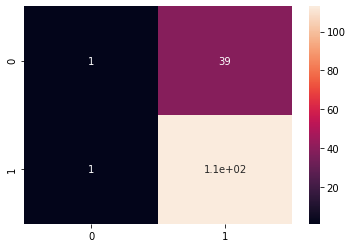

In [28]:
from sklearn.svm import SVC

SVMm = SVC(kernel='poly', random_state = 1)

SVMm.fit(train_f,train_L)
y_pred_svm = SVMm.predict(train_f)
print("Training Data Set Accuracy: ", accuracy_score(train_L,y_pred_svm))
print("Training Data F1 Score ", f1_score(train_L,y_pred_svm))
print ('Training Precision:', precision_score(train_L,y_pred_svm))
print ('Training Recall:', recall_score(train_L,y_pred_svm))

test_pred_svm = SVMm.predict(test_f)
print("Testing Data Set Accuracy: ", accuracy_score(test_L,test_pred_svm))
print("Testing Data F1 Score ", f1_score(test_L,test_pred_svm))
print ('Testing Precision:', precision_score(test_L,test_pred_svm))
print ('Testing Recall:', recall_score(test_L,test_pred_svm))

cf_matrix = confusion_matrix(test_L, test_pred_svm)
sns.heatmap(cf_matrix, annot=True)